In [1]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def plot_conf_mat(ytrue,ypred,title,savepath):
    cm = confusion_matrix(ytrue,ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Composite','Prime'])
    disp.plot()
    plt.title(title)
    plt.savefig(savepath)

In [3]:
def is_factorization_correct(num,factors):
    factors
    if num != factors[-1]:
        return False
    if 1 not in factors:
        return False
    i=0
    l= len(factors)-1
    while i<l:
        if factors[i]*factors[l-i] != num:
            return False
        i+=1
    return True

In [4]:
# read in the primality test data
with open("../../data/primality_test.json","r") as file:
    test_data = json.load(file)

primes = set(test_data['primes'])
composites = set(test_data['composites'])

In [5]:
responses = []

with open("gemini_response/factors_response.txt","r") as file:
    for line in file:
        line_ = line.strip()
        # remove Factors of
        line_ = re.sub(r'Factors of','',line_)
        # remove leading and trailing whitespace
        line_ = line_.strip()
        # split the line into number and factors
        num,factors = line_.split("=")
        # convert the number to int
        num = int(num)
        # convert the factors to a list of ints
        factors = json.loads(factors)
        
        responses.append((num,factors))

print("Number of responses: ",len(responses))

Number of responses:  9986


In [6]:
# check if factors indeed get multiplied to give the number
factorization_correct = []
wrong_examples = []
for num,factors in responses:
    factorization_correct.append(is_factorization_correct(num,factors))
    if not is_factorization_correct(num,factors):
        wrong_examples.append((num,factors))

print("Factorization correct: ",np.sum(factorization_correct))
print("factorization accuracy: ",np.mean(factorization_correct)*100,'%')

Factorization correct:  6263
factorization accuracy:  62.71780492689766 %


In [7]:
# visualize some wrong examples
# number, factors, product
wrong_examples[np.random.randint(0,len(wrong_examples))]

(1227, [1, 3, 11, 37, 111, 1227])

## decide if number is prime or not by factors

True number of primes:  4992
True number of composites:  4994
Predicted number of primes:  4047
Predicted number of composites:  5939


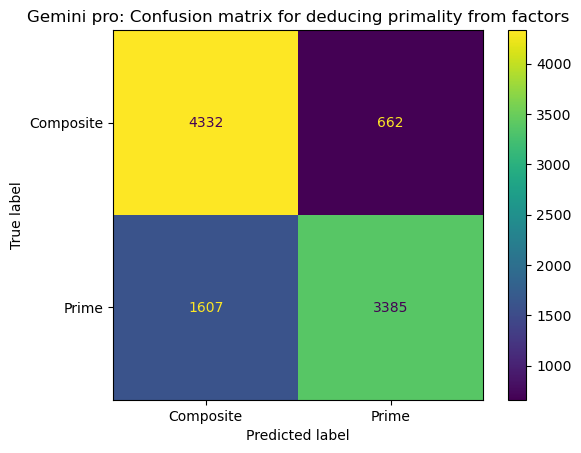

In [8]:
# using all responses
y_true_factor_all_resp = []
y_pred_factor_all_resp = []

for num,factors in responses:
    if num in primes:
        y_true_factor_all_resp.append(1)
    elif num in composites:
        y_true_factor_all_resp.append(0)
    else:
        print("Number not found in test data: ",num)
    
    if len(factors) == 2 and 1 in factors and num in factors:
        y_pred_factor_all_resp.append(1)
    else:
        y_pred_factor_all_resp.append(0)

print("True number of primes: ",np.sum(y_true_factor_all_resp))
print("True number of composites: ",len(y_true_factor_all_resp)-np.sum(y_true_factor_all_resp))

print("Predicted number of primes: ",np.sum(y_pred_factor_all_resp))
print("Predicted number of composites: ",len(y_pred_factor_all_resp)-np.sum(y_pred_factor_all_resp))

plot_conf_mat(y_true_factor_all_resp,y_pred_factor_all_resp,"Gemini pro: Confusion matrix for deducing primality from factors","gemini_response/plots/confusion_matrix_primality_from_factors.png")


True number of primes:  3385
True number of composites:  2878
Predicted number of primes:  4047
Predicted number of composites:  2216


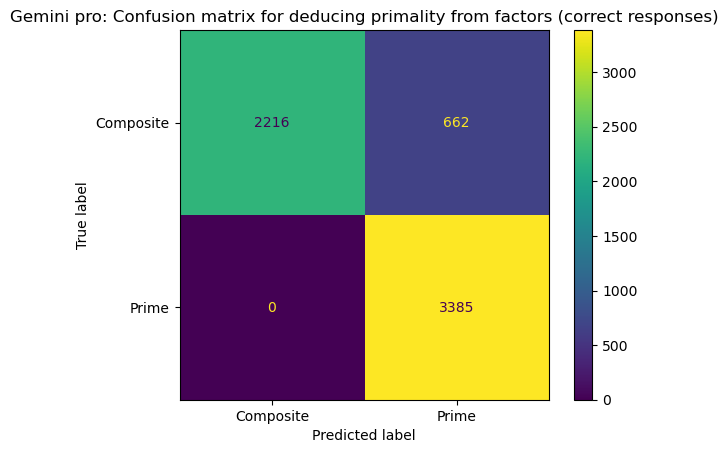

In [9]:
# using only correct responses
y_true_factor_correct_resp = []
y_pred_factor_correct_resp = []

for num,factors in responses:

    if not is_factorization_correct(num,factors):
        continue

    if num in primes:
        y_true_factor_correct_resp.append(1)
    elif num in composites:
        y_true_factor_correct_resp.append(0)
    else:
        print("Number not found in test data: ",num)
    
    if len(factors) == 2 and 1 in factors and num in factors:
        y_pred_factor_correct_resp.append(1)
    else:
        y_pred_factor_correct_resp.append(0)

print("True number of primes: ",np.sum(y_true_factor_correct_resp))
print("True number of composites: ",len(y_true_factor_correct_resp)-np.sum(y_true_factor_correct_resp))

print("Predicted number of primes: ",np.sum(y_pred_factor_correct_resp))
print("Predicted number of composites: ",len(y_pred_factor_correct_resp)-np.sum(y_pred_factor_correct_resp))

plot_conf_mat(y_true_factor_correct_resp,y_pred_factor_correct_resp,"Gemini pro: Confusion matrix for deducing primality from factors (correct responses)","gemini_response/plots/confusion_matrix_primality_from_factors_correct_responses.png")
